In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/Bank_churn.csv")

In [3]:
df.head()

rownumber  customerid   surname  creditscore geography  gender  age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   tenure    balance  numofproducts  hascrcard  isactivemember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   estimatedsalary  churn  
0        101348.88      1  
1        112542.58      0  
2        113931.57      1  
3         93826.63      0  
4         79084.10      0

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
def load_and_preprocess_data(file_path: str, target_column: str) -> pd.DataFrame:
    """
    Load and preprocess the dataset from a CSV file.

    Args:
        file_path (str): Path to the CSV dataset file.
        target_column (str): Name of the target column for churn.

    Returns:
        pd.DataFrame: Processed DataFrame ready for model training.
    """

    # Load the dataset
    if not file_path.endswith('.csv'):
        raise ValueError("Unsupported file type: only CSV files are supported.")
    
    data = pd.read_csv(file_path)

    # Separate features and target variable
    X = data.drop(columns=[target_column])
    y = data[target_column]

    # Handle missing values
    # Strategy: For numeric columns, we can use 'mean', and for categorical, we can use 'most_frequent'
    numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categorical_features = X.select_dtypes(include=['object']).columns.tolist()
    
    imputer_numeric = SimpleImputer(strategy='mean')
    imputer_categorical = SimpleImputer(strategy='most_frequent')

    X[numeric_features] = imputer_numeric.fit_transform(X[numeric_features])
    X[categorical_features] = imputer_categorical.fit_transform(X[categorical_features])

    # Encode categorical features using Label Encoding
    if categorical_features:
        label_encoder = LabelEncoder()
        for feature in categorical_features:
            X[feature] = label_encoder.fit_transform(X[feature])

    # Scale numeric features
    scaler = StandardScaler()
    X[numeric_features] = scaler.fit_transform(X[numeric_features])

    # Combine processed features and target variable
    processed_data = pd.concat([X, y.reset_index(drop=True)], axis=1)

    return processed_data

In [11]:
file_path = '../data/Bank_churn.csv'  # Adjust the file path as necessary
target_column = 'churn'
processed_data = load_and_preprocess_data(file_path, target_column)
print(processed_data.head())

   rownumber  customerid  surname  creditscore  geography  gender       age  \
0  -1.731878   -0.783213     1115    -0.326221          0       0  0.293517   
1  -1.731531   -0.606534     1177    -0.440036          2       0  0.198164   
2  -1.731185   -0.995885     2040    -1.536794          0       0  0.293517   
3  -1.730838    0.144767      289     0.501521          0       0  0.007457   
4  -1.730492    0.652659     1822     2.063884          2       0  0.388871   

     tenure   balance  numofproducts  hascrcard  isactivemember  \
0 -1.041760 -1.225848      -0.911583   0.646092        0.970243   
1 -1.387538  0.117350      -0.911583  -1.547768        0.970243   
2  1.032908  1.333053       2.527057   0.646092       -1.030670   
3 -1.387538 -1.225848       0.807737  -1.547768       -1.030670   
4 -1.041760  0.785728      -0.911583   0.646092        0.970243   

   estimatedsalary  churn  
0         0.021886      1  
1         0.216534      0  
2         0.240687      1  
3        -

In [12]:
def perform_eda(data, top_features=10, max_scatter_plots=20):
    """
    Perform Exploratory Data Analysis on the dataset.

    Args:
        data (pandas.DataFrame): The dataset to perform EDA on.
        top_features (int, optional): The number of top features to display in visualizations. Defaults to 10.
        max_scatter_plots (int, optional): The maximum number of scatter plots to generate. Defaults to 20.
    """

    # Basic overview
    print("Dataset Shape:", data.shape)
    print(data.info())
    print(data.describe(include='all'))

    # Check for missing values
    plt.figure(figsize=(10, 6))
    sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.show()

    # Separate features into numeric and categorical
    numeric_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categorical_features = data.select_dtypes(include=['object']).columns.tolist()

    # Distribution of top numeric features
    num_numeric_features = min(len(numeric_features), top_features)
    num_rows = math.ceil(num_numeric_features / 3)  # Adjust the number of rows as needed
    plt.figure(figsize=(15, num_rows * 5))  # Adjust the figure size based on the number of rows

    for i, feature in enumerate(numeric_features[:top_features]):
        plt.subplot(num_rows, 3, i + 1)
        sns.histplot(data[feature], bins=30, kde=True)
        plt.title(f'Distribution of {feature}')

    plt.tight_layout()
    plt.show()

    # Correlation matrix for top numeric features
    plt.figure(figsize=(12, 8))
    correlation_matrix = data[numeric_features[:top_features]].corr()
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
    plt.title('Correlation Matrix')
    plt.show()

    # Visualizing relationships between top numeric feature pairs
    num_scatter_plots = min(len(numeric_features) * (len(numeric_features) - 1) // 2, max_scatter_plots)
    scatter_plot_count = 0

    for i in range(len(numeric_features)):
        for j in range(i+1, len(numeric_features)):
            if scatter_plot_count >= num_scatter_plots:
                break

            plt.figure(figsize=(10, 6))
            sns.scatterplot(x=numeric_features[i], y=numeric_features[j], data=data)
            plt.title(f'Relationship between {numeric_features[i]} and {numeric_features[j]}')
            plt.xlabel(numeric_features[i])
            plt.ylabel(numeric_features[j])
            plt.xticks(rotation=45)
            plt.show()
            scatter_plot_count += 1

    # Churn by categorical features
    for feature in categorical_features[:top_features]:
        plt.figure(figsize=(10, 6))
        data[feature].value_counts().plot(kind='bar')
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

Dataset Shape: (10000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  float64
 1   customerid       10000 non-null  float64
 2   surname          10000 non-null  int32  
 3   creditscore      10000 non-null  float64
 4   geography        10000 non-null  int32  
 5   gender           10000 non-null  int32  
 6   age              10000 non-null  float64
 7   tenure           10000 non-null  float64
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  float64
 10  hascrcard        10000 non-null  float64
 11  isactivemember   10000 non-null  float64
 12  estimatedsalary  10000 non-null  float64
 13  churn            10000 non-null  int64  
dtypes: float64(10), int32(3), int64(1)
memory usage: 976.7 KB
None
          rownumber    customerid       surname   creditscore

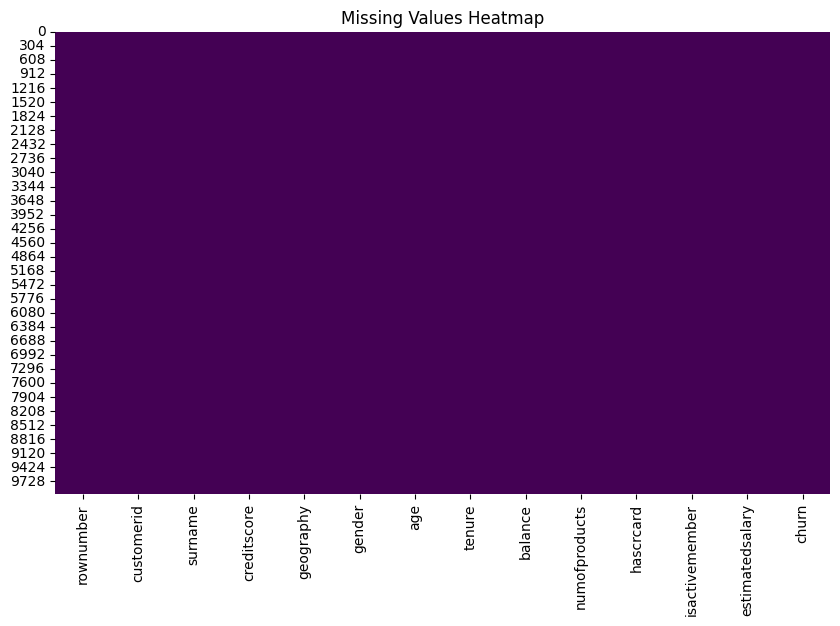

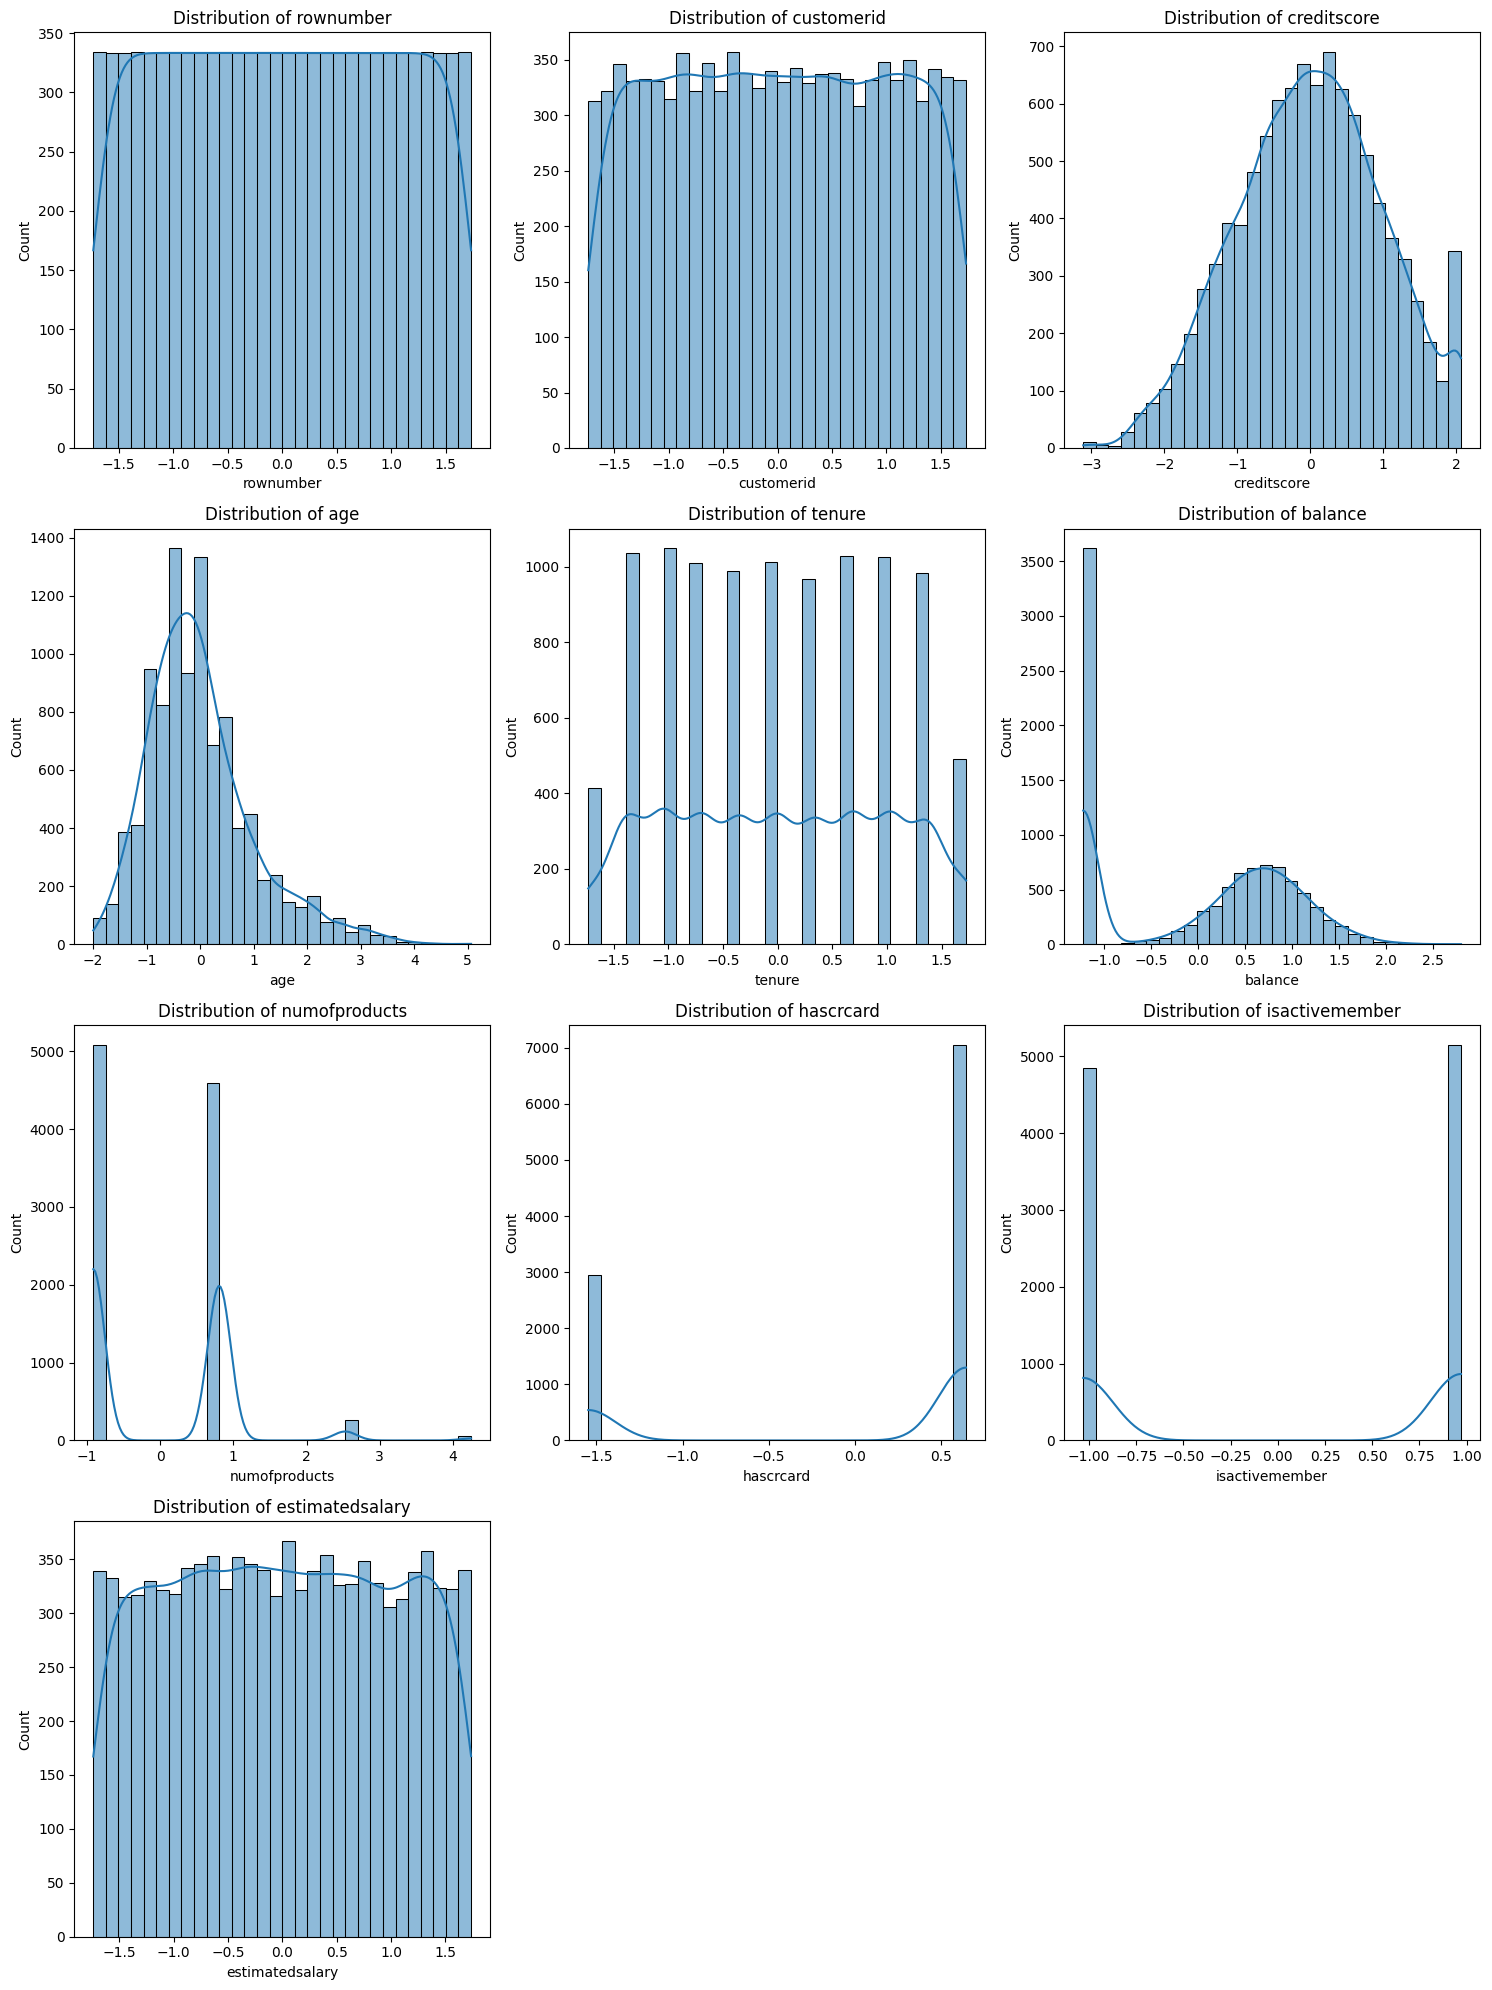

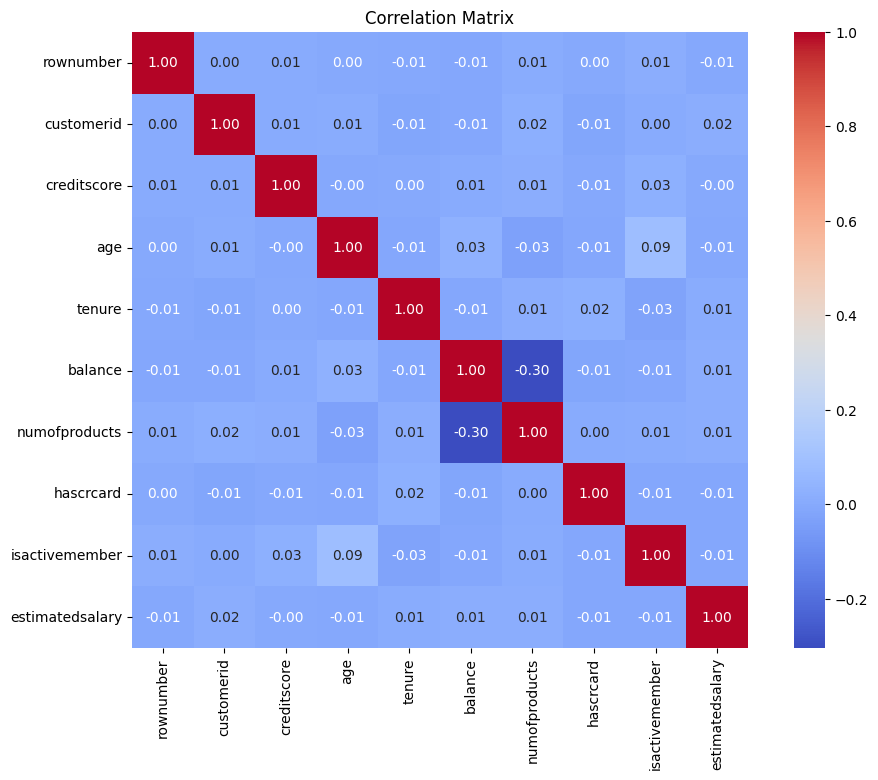

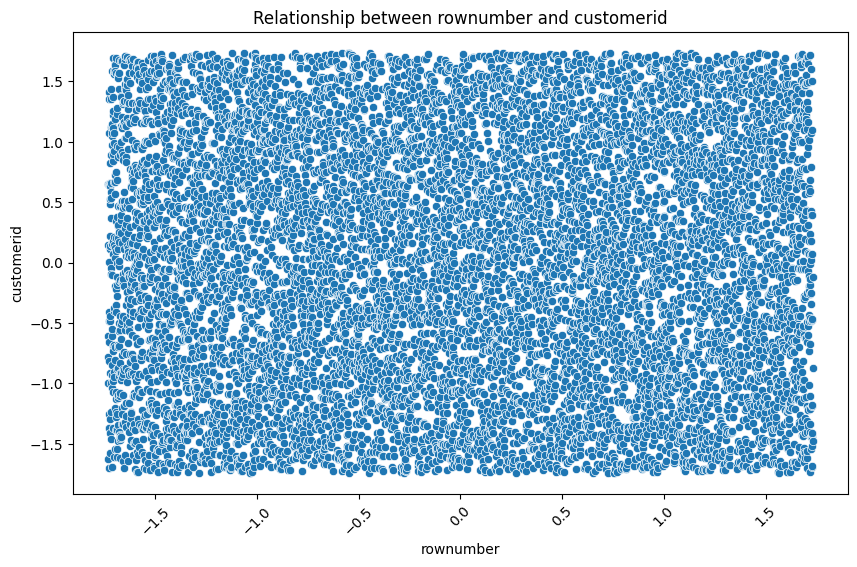

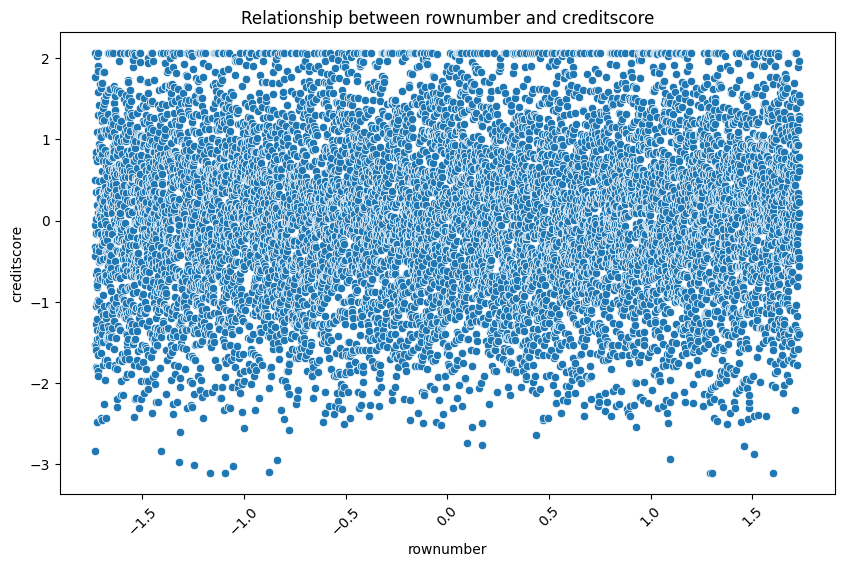

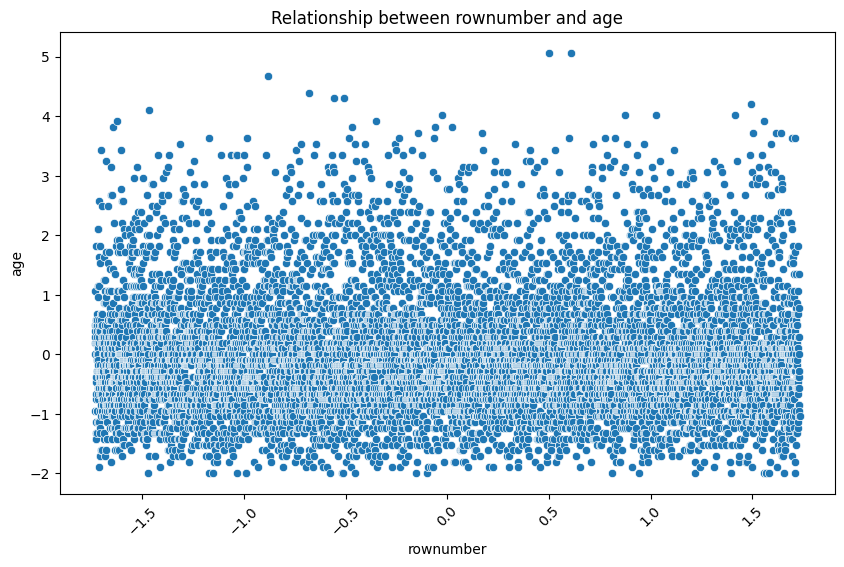

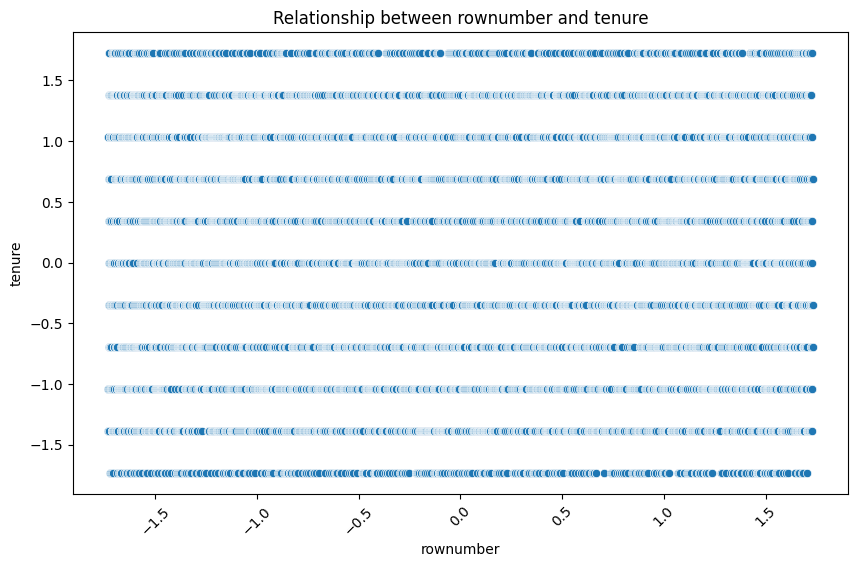

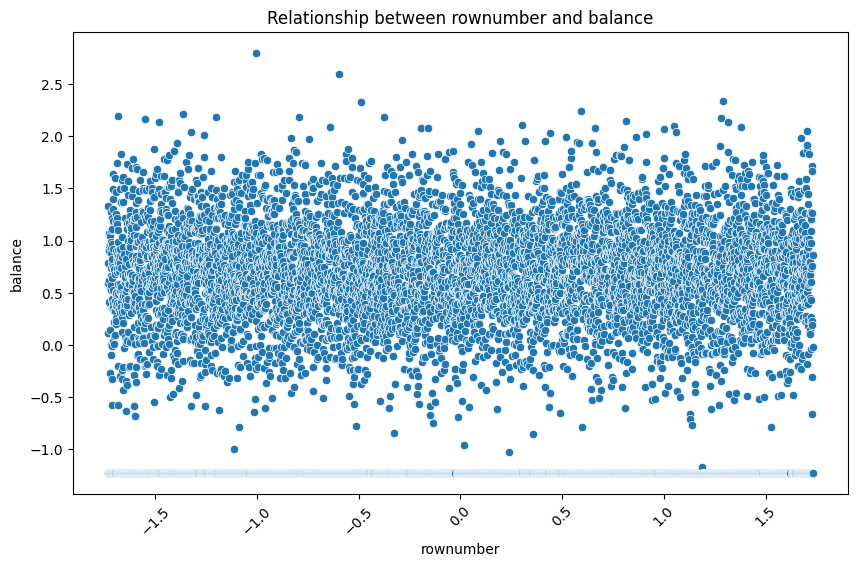

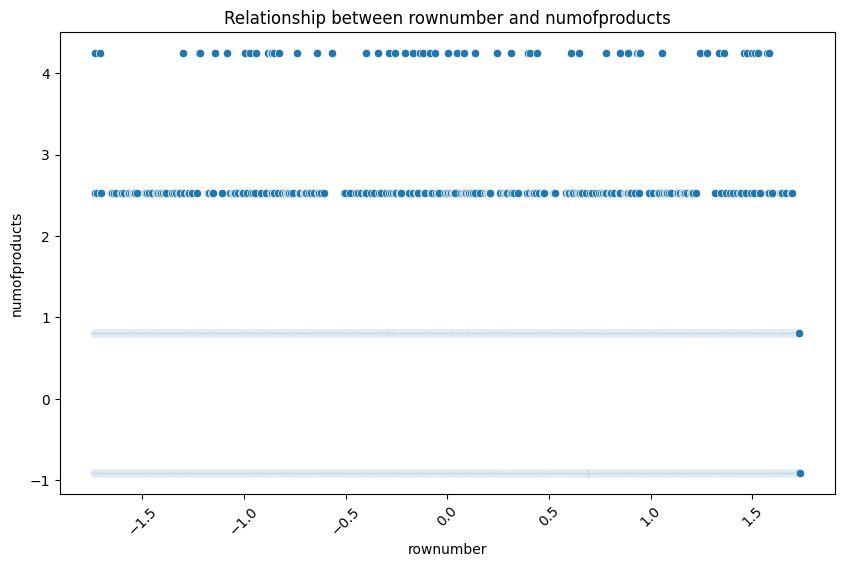

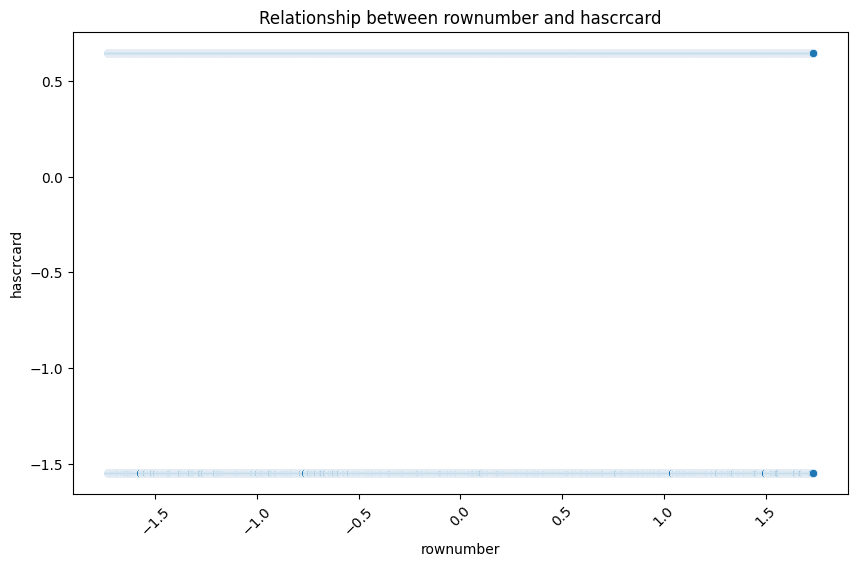

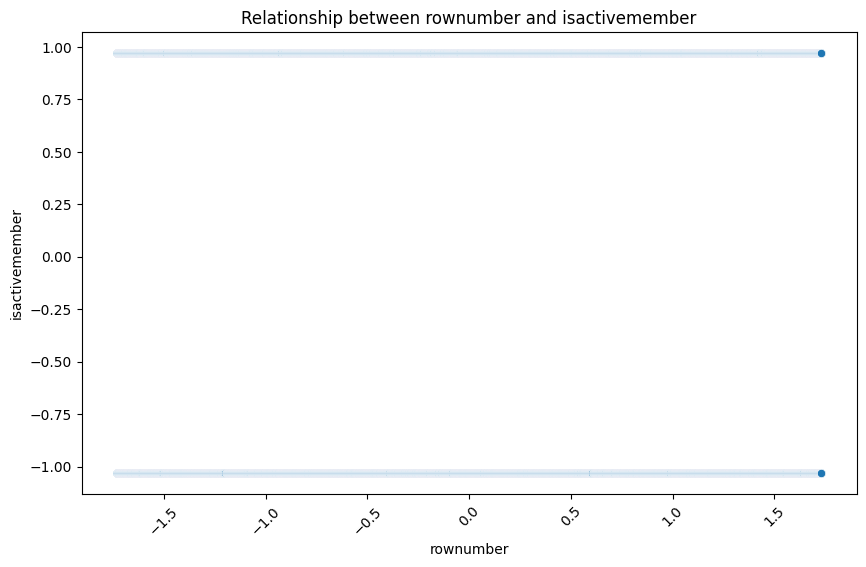

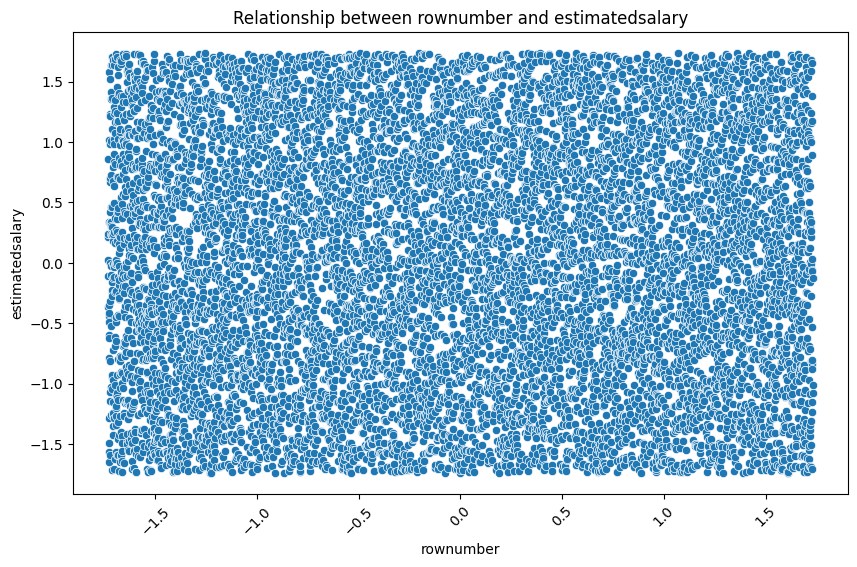

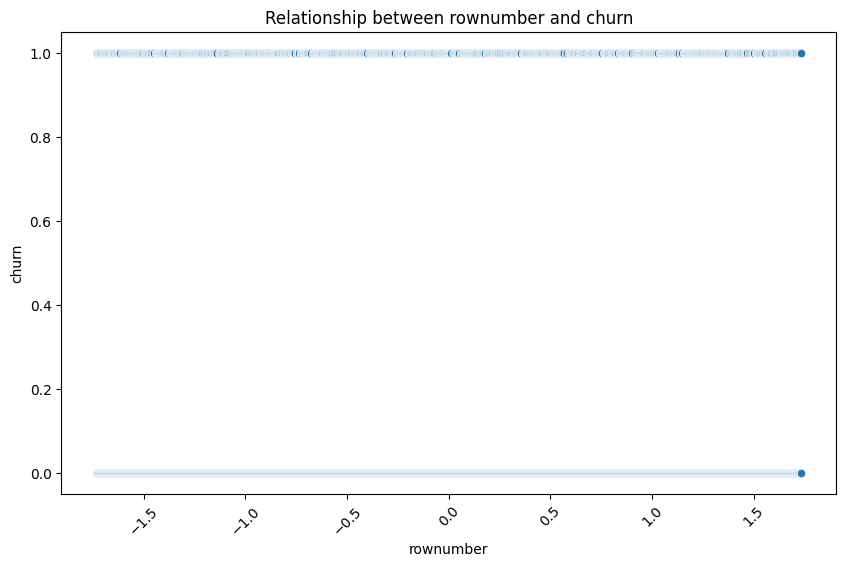

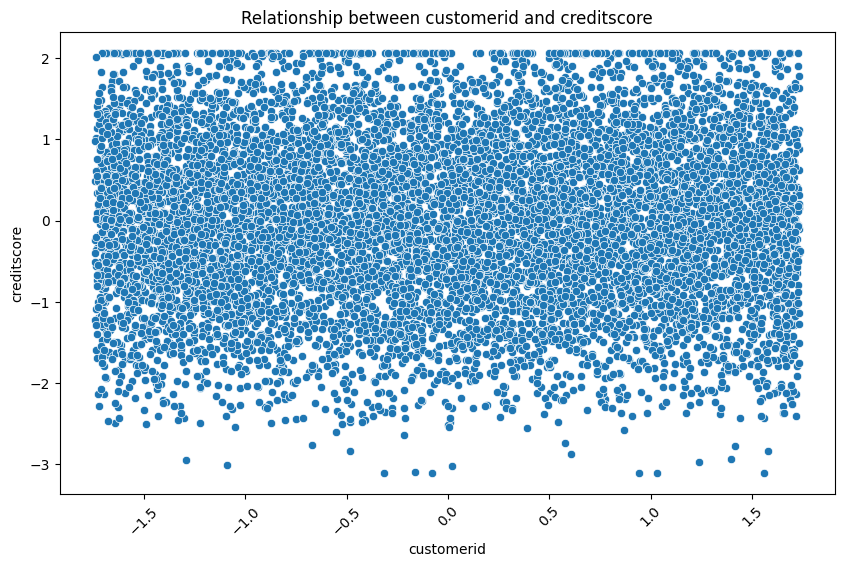

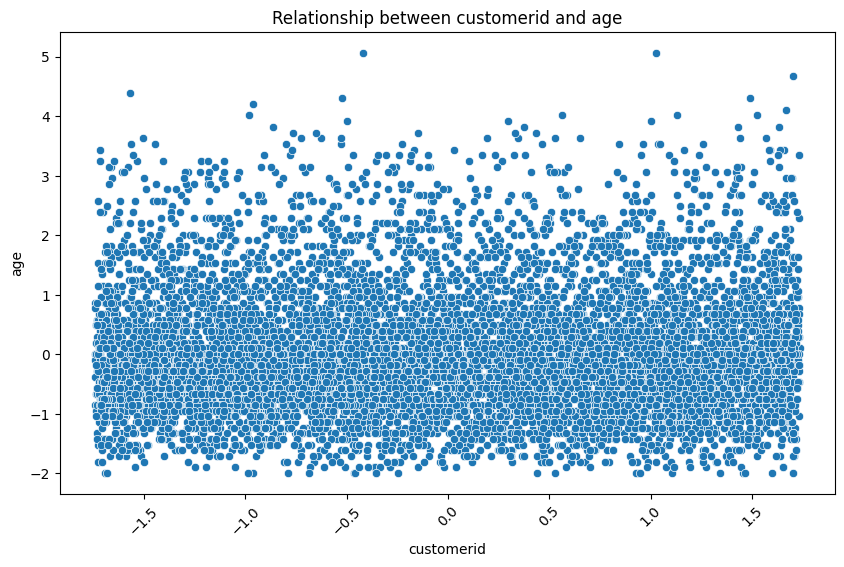

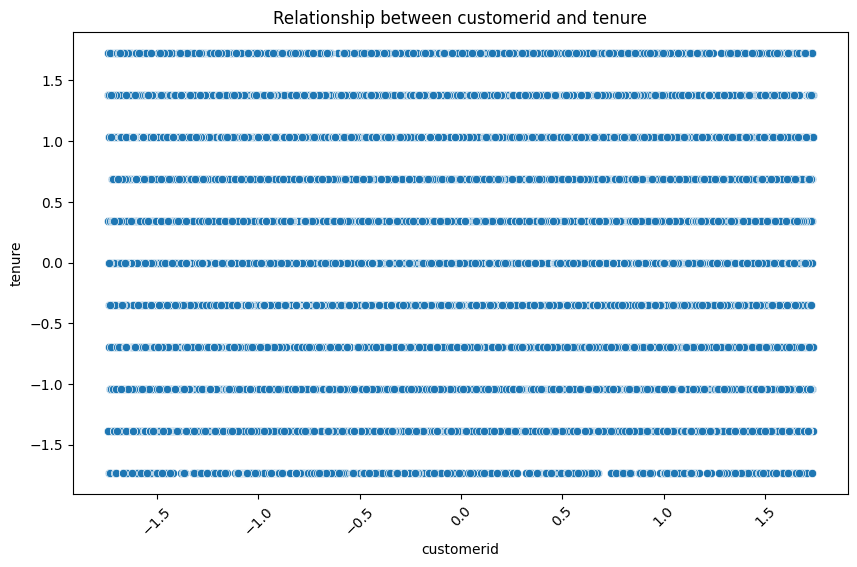

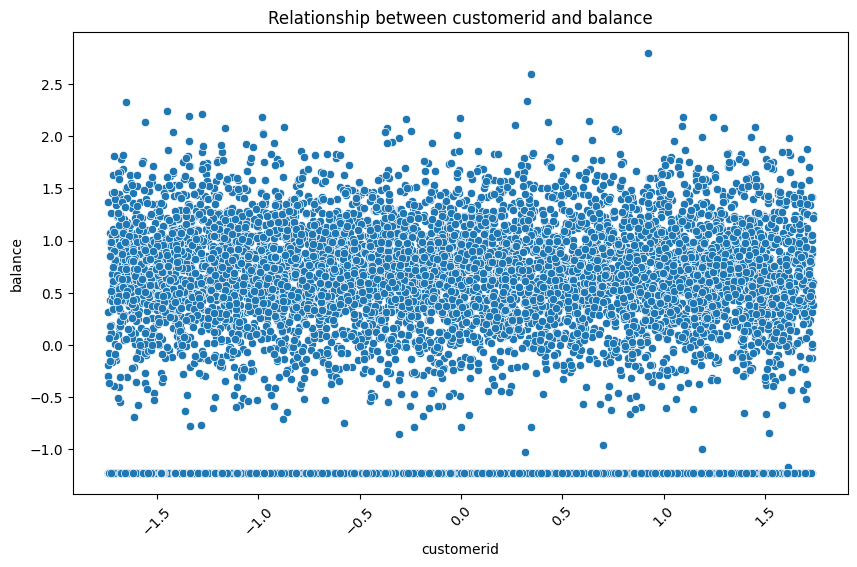

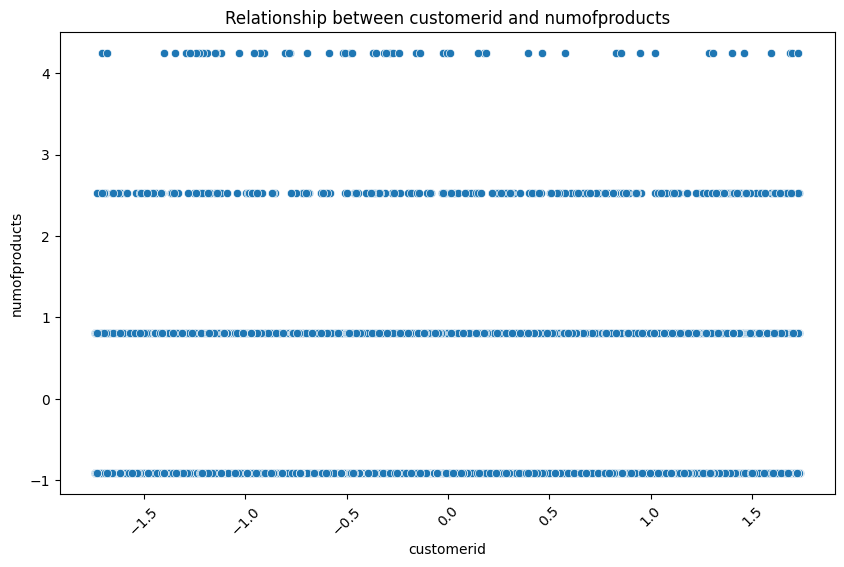

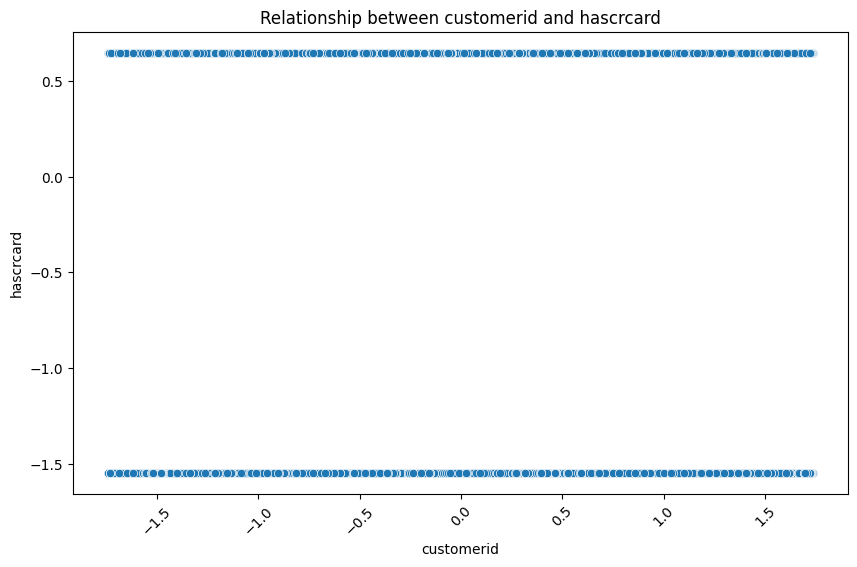

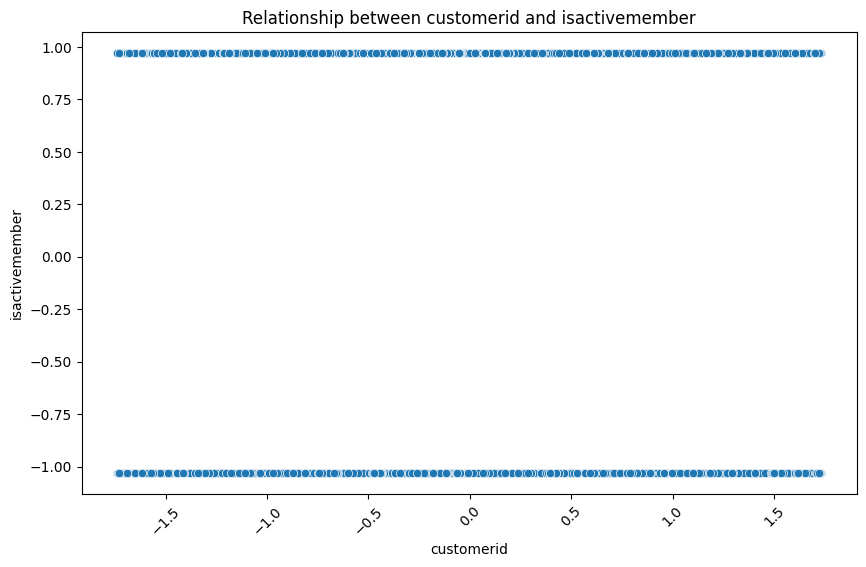

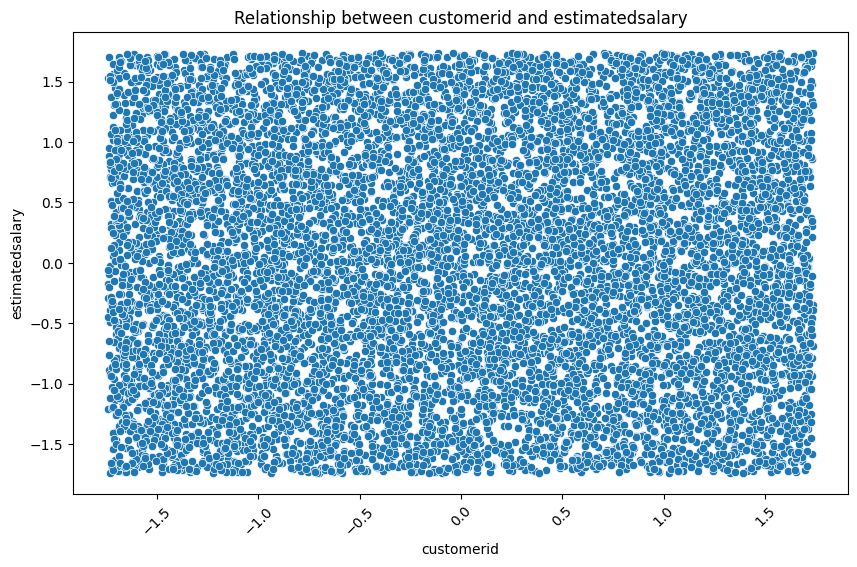

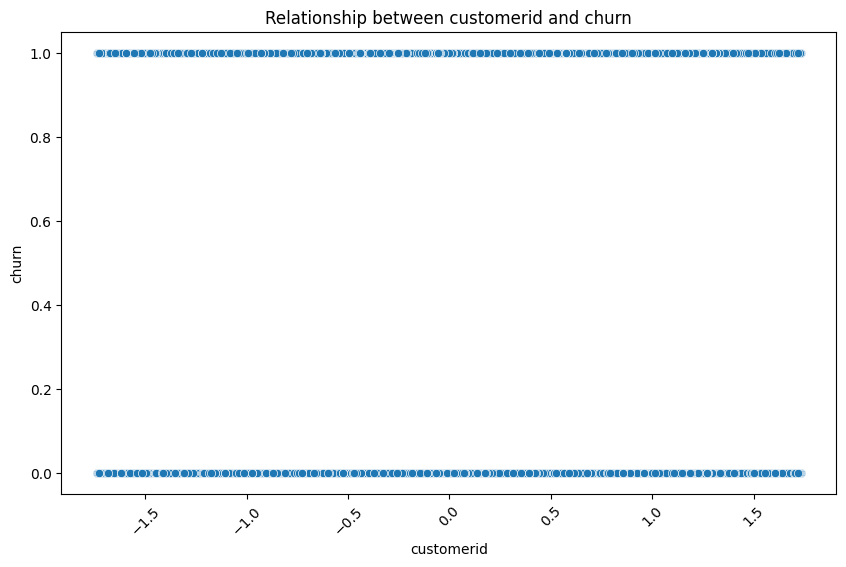

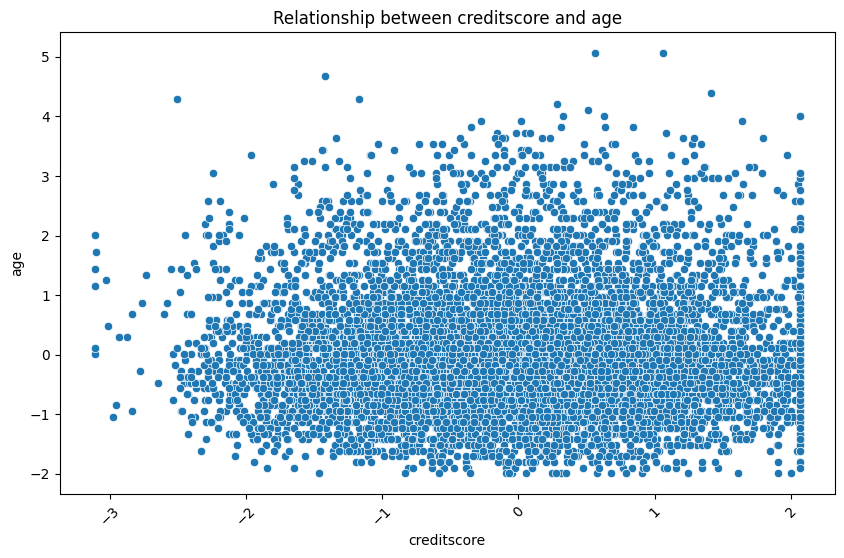

In [13]:
perform_eda(processed_data)

In [14]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def remove_multicollinear_features(df, threshold=0.8, vif_threshold=5):
    """
    Remove features that exhibit multicollinearity based on correlation .

    Args:
        df (pandas.DataFrame): The dataset to analyze.
        threshold (float): Correlation threshold for identifying multicollinearity.
        vif_threshold (float): VIF threshold for identifying multicollinearity.

    Returns:
        pandas.DataFrame: The dataset with multicollinear features removed.
    """
    
    # Calculate the correlation matrix
    correlation_matrix = df.corr()
    
    # Identify highly correlated features
    high_corr_var = set()
    
    # Use numpy's upper triangle to avoid redundant checks
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                colname = correlation_matrix.columns[i]
                high_corr_var.add(colname)

    print("Highly correlated features:", high_corr_var)

    all_features_to_drop = list(high_corr_var)

    df_reduced = df.drop(columns=all_features_to_drop)

    print("Features removed due to high multicollinearity:", all_features_to_drop)
    
    return df_reduced

def feature_engineering(df):
    """
    Perform feature engineering by creating new features from existing ones.

    Args:
        df (pandas.DataFrame): The dataset to engineer features from.

    Returns:
        pandas.DataFrame: The dataset with new features added.
    """
    
    # Example of creating new interaction terms or polynomial features
    if 'age' in df.columns and 'income' in df.columns:
        df['age_income_interaction'] = df['age'] * df['income']
   
   # Binning age into categories if applicable
    if 'age' in df.columns:
        bins = [0, 25, 45, 65, 100]
        labels = ['18-24', '25-44', '45-64', '65+']
        df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
        
    return df

# Example usage:
# Assuming you have already loaded your DataFrame as `df`
# df_cleaned = remove_multicollinear_features(df)
# df_engineered = feature_engineering(df_cleaned)

In [15]:
df = remove_multicollinear_features(processed_data)
df.head()

Highly correlated features: set()
Features removed due to high multicollinearity: []


rownumber  customerid  surname  creditscore  geography  gender       age  \
0  -1.731878   -0.783213     1115    -0.326221          0       0  0.293517   
1  -1.731531   -0.606534     1177    -0.440036          2       0  0.198164   
2  -1.731185   -0.995885     2040    -1.536794          0       0  0.293517   
3  -1.730838    0.144767      289     0.501521          0       0  0.007457   
4  -1.730492    0.652659     1822     2.063884          2       0  0.388871   

     tenure   balance  numofproducts  hascrcard  isactivemember  \
0 -1.041760 -1.225848      -0.911583   0.646092        0.970243   
1 -1.387538  0.117350      -0.911583  -1.547768        0.970243   
2  1.032908  1.333053       2.527057   0.646092       -1.030670   
3 -1.387538 -1.225848       0.807737  -1.547768       -1.030670   
4 -1.041760  0.785728      -0.911583   0.646092        0.970243   

   estimatedsalary  churn  
0         0.021886      1  
1         0.216534      0  
2         0.240687      1  
3        -0.108918      0  
4        -0.365276      0

In [16]:
df.to_csv("../data/output_file.csv")